In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

datadir0  = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/'
plotsdir  = '//Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Plots/'


clrs = ['black',"#c239e8","#1f78b4","#b2df8a","#33a02c"]

In [2]:

# Function to extract the first number after "Gaussian"
def extract_time_from_filename(fname):
    match = re.search(r'Gaussian(\d+)', fname)
    return int(match.group(1)) if match else None



Fetching no stretch data

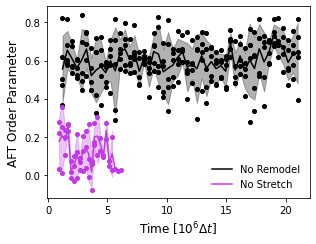

In [3]:
folderhandles = ['NoRemodel_Xstretch100/','NoStretch/']
folderhandle1 = folderhandles[0]
seeds = "1 2 3 4 5".split()
labels = ['No Remodel', 'No Stretch']

fig,ax = plt.subplots(figsize = (4.5,3.5))
for ff in range(len(folderhandles)):
    all_data = []
    folderhandle = folderhandles[ff]
    if ff == 0:
        seeds = "1 2 3 4 5".split()
    elif ff == 1:
        seeds = "1 2 3".split()

    for s in range(len(seeds)):
        datapath = datadir0+folderhandles[ff]+"/median_order_parameterWtNames_seed"+seeds[s]+".csv"
        OPdata = pd.read_csv(datapath, header = 'infer')
        OrderParameter = OPdata['median_order_parameter']
        FileNames = OPdata['file_name']
        OPdata['time'] = FileNames.apply(extract_time_from_filename)
       
        Time = OPdata['time']
        if ff==1:
            Time = np.multiply(Time, 2)  # Convert time to millions of frames
        all_data.append(OPdata[['time', 'median_order_parameter']])
        if s==0:
            seed1_data = OPdata

        ax.plot(np.divide(Time,1e6),OrderParameter,color=clrs[ff],linestyle='',marker = 'o',markersize = 4)
    # Combine and group
    combined = pd.concat(all_data)
    grouped = combined.groupby('time')['median_order_parameter']
    mean_OP = grouped.mean()
    std_OP = grouped.std()
    Time = mean_OP.index
    if ff == 1:
        Time = np.multiply(Time, 2)

    ax.plot(np.divide(Time,1e6), mean_OP.values, color=clrs[ff], label=labels[ff])
    ax.fill_between(np.divide(Time,1e6), mean_OP - std_OP, mean_OP + std_OP, color=clrs[ff], alpha=0.3)
ax.set_xlabel(r'Time [$10^6\Delta t$]', fontsize=12)
ax.set_ylabel('AFT Order Parameter', fontsize=12)
fig.tight_layout()
ax.legend(frameon=False)
fig.savefig(plotsdir+'AFT_OrderParameter_NoRemodelVsNoStretch.pdf')
# Plot

# folderhandle = 'Images_Stretch/den0.05_Xstretch'
# #seeds = "1 2 3".split()
# names = '0.85_F0.75_seed1 0.85_F0.75_seed2'.split()
# labels = ['Stretch 85%', 'Stretch 85%']
# #all_data = []

# all_data=[]
# for s in range(2):
#     # Part 1: Early file
#     datapath00 = datadir0 + folderhandle1 + seeds[s] + "/output/median_order_parameterWtNames.csv"
#     OPdata00 = pd.read_csv(datapath00, header='infer')
#     OPdata00['time'] = OPdata00['file_name'].apply(extract_time_from_filename)

#     # Part 2: Later file
#     datapath = datadir0+folderhandle+names[s]+"/output/median_order_parameterWtNames.csv"
#     OPdata = pd.read_csv(datapath, header='infer')
#     OPdata['time'] = OPdata['file_name'].apply(extract_time_from_filename)

#     # Determine cutoff index in OPdata00 to avoid overlapping with OPdata
#     indexEnd = np.argmin(np.abs(OPdata00['time'].values - OPdata['time'].iloc[0]))

#     # Stitch the time and OP arrays
#     time_total = np.concatenate([OPdata00['time'].values[:indexEnd], OPdata['time'].values])
#     OP_total = np.concatenate([OPdata00['median_order_parameter'].values[:indexEnd], OPdata['median_order_parameter'].values])

#     # Store as DataFrame for grouping
#     df_seed = pd.DataFrame({'time': time_total, 'median_order_parameter': OP_total})
#     all_data.append(df_seed)

#     # Optional plot for each seed
#     ax.plot(time_total, OP_total, color=clrs[s+1], label=labels[s], linestyle='', marker='o', markersize=4)

# # Combine and group across all seeds
# combined = pd.concat(all_data)
# grouped = combined.groupby('time')['median_order_parameter']
# mean_OP = grouped.mean()
# std_OP = grouped.std()

# # Plot
# ax.plot(mean_OP.index, mean_OP.values, color=clrs[0], label='No stretch')
# ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color=clrs[0], alpha=0.3)
# #ax.plot(mean_OP.index, mean_OP.values, color='black', label='Mean', marker='o')
# #ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3, label='±1 STD')
# ax.set_xlabel(r'Time [$\Delta t$]',fontsize=12)
# ax.set_ylabel('Median Order Parameter',fontsize=12)
# ax.set_title(' Window size 50, overlap 50%, neighbourhood 5',fontsize=12)
# ax.legend(frameon=False)
# ax.set_ylim([-0.5,0.8])

# ax.plot(mean_OP.index, mean_OP.values, color='black', label='Mean', marker='o')
# ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3, label='±1 STD')
# ax.set_ylim([-0.5, 0.5])
# ax.set_xlabel('Time')
# ax.set_ylabel('Order Parameter')
# ax.set_title('No Stretch, Window size 50, overlap 50%, neighbourhood 5')
# ax.legend()
# ax.set_ylim([-0.5,0.5])

Getting some data for stretched networks